# Explore here

In [413]:
# Random algo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [414]:
# Load data set
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [415]:
# Count zeros in the entire dataset
zero_count = (df == 0).sum().sum()
print(f"Number of zeros: {zero_count}")

Number of zeros: 1263


In [416]:
# Inspect data structure
print("Data Structure")
print(df.info())

Data Structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [417]:
# Summary statistics
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

In [418]:
# Check for missing values
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


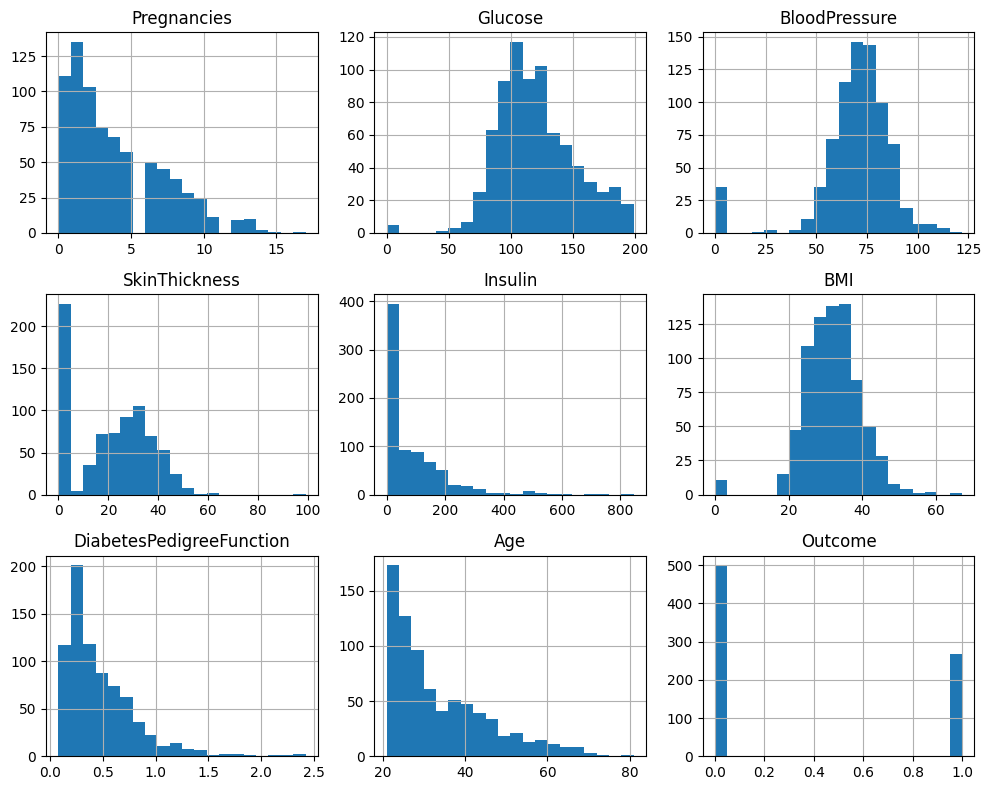

In [419]:
# Visualize the distribution of numerical columns
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()  

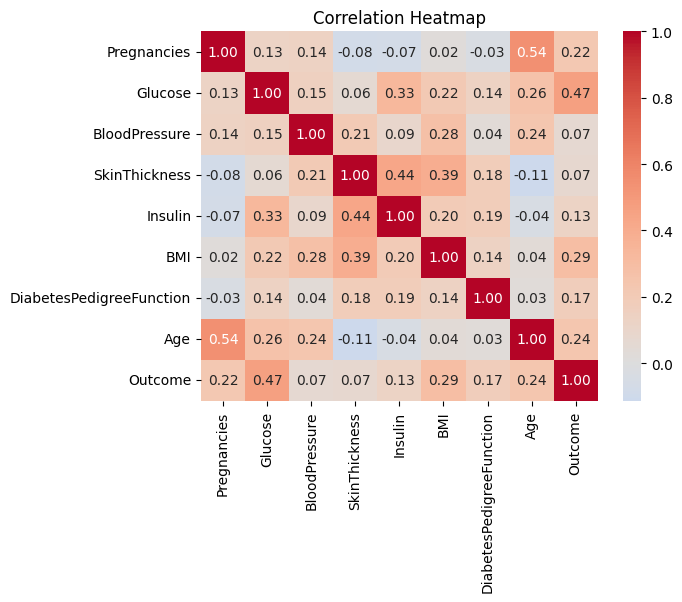

In [420]:
# Visualize correlations between numerical features using a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [421]:
# Split the data into x and y 
X = df.drop('Outcome', axis=1)  # All columns except 'y'
y = df['Outcome']  # The target variable (subscription outcome)

In [422]:
X.shape

(768, 8)

In [423]:
y.shape

(768,)

In [424]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [425]:
# Replace zeros with the mean of each column 
X = X.apply(lambda col: col.replace(0, col.mean()))
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [426]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [427]:
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7337662337662337


In [428]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')


In [429]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [430]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.7817589576547231


In [431]:
# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

In [432]:
# Print the results to see the structure
print(results[['param_n_estimators', 'param_max_depth', 'mean_test_score']])    

    param_n_estimators  param_max_depth  mean_test_score
0                   50                5         0.758958
1                  100                5         0.770358
2                  200                5         0.773616
3                   50                5         0.773616
4                  100                5         0.780130
..                 ...              ...              ...
76                 100               20         0.776873
77                 200               20         0.778502
78                  50               20         0.778502
79                 100               20         0.776873
80                 200               20         0.776873

[81 rows x 3 columns]


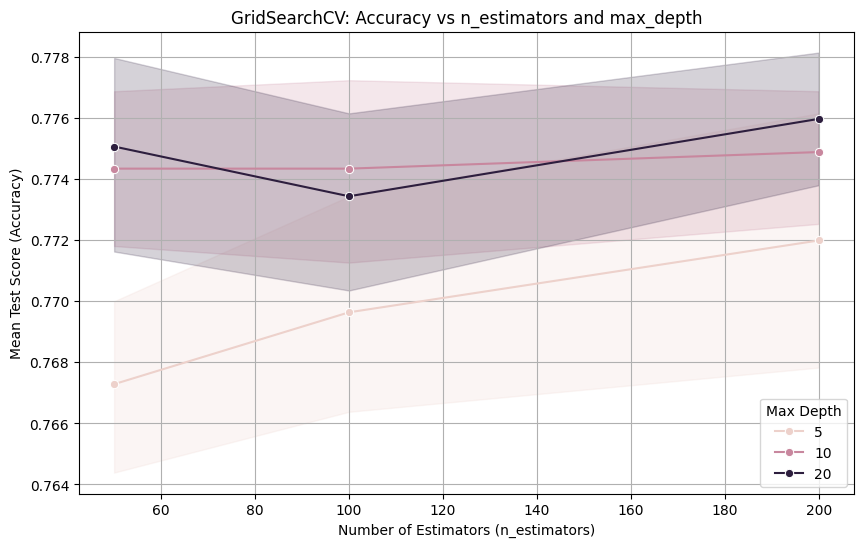

In [433]:
# Plotting accuracy vs n_estimators for each max_depth
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=results, marker='o')
plt.title('GridSearchCV: Accuracy vs n_estimators and max_depth')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(title='Max Depth', loc='best')
plt.grid(True)
plt.show()